In [9]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [11]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

In [12]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [13]:
# Extract all rows of data
table_header = html_soup.find_all('th')
print(table_header)

table_rows = html_soup.find_all('tr',class_='data-row')
print(table_rows)

[<th>id</th>, <th>terrestrial_date</th>, <th>sol</th>, <th>ls</th>, <th>month</th>, <th>min_temp</th>, <th>pressure</th>]
[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</

In [23]:
# Create empty lists to contain the header elements 
header_elements = []
row_elements = []

# Create a for loop to extract the header elements 
for header_element in table_header: 
    headings = header_element.text.strip()
    header_elements.append(headings)

print(header_elements)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [24]:
# Create a for loop to extract the row elements 
for row in table_rows:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    row_elements.append(row_data)
    
print(row_elements)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [25]:
#Create a Pandas Datafram by using the list of rows and a list of the column names

mars_df = pd.DataFrame(row_elements, columns=header_elements)
print(mars_df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [26]:
#Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [28]:
#Examine the data types that are currently associated with each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [30]:
mars_df[[ 'terrestrial_date']] = mars_df[['terrestrial_date']].astype('datetime64[ns]')
mars_df[[ 'sol', 'ls', 'month']] = mars_df[['sol', 'ls', 'month']].astype('int64')
mars_df[[ 'min_temp', 'pressure']] = mars_df[['min_temp', 'pressure']].astype('float64')
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [31]:
#confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [32]:
#Group by statements 
group_by_month = mars_df.groupby('month')
group_by_date = mars_df.groupby('terrestrial_date')
group_by_pressure = mars_df.groupby('pressure')

In [33]:
#How many months exist on Mars?
group_by_month['month'].count()/3

month
1     58.000000
2     59.333333
3     64.000000
4     64.666667
5     49.666667
6     49.000000
7     47.333333
8     47.000000
9     44.666667
10    37.333333
11    46.000000
12    55.333333
Name: month, dtype: float64

In [34]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
group_by_date['terrestrial_date'].count()

terrestrial_date
2012-08-16    1
2012-08-17    1
2012-08-18    1
2012-08-19    1
2012-08-20    1
             ..
2018-02-23    1
2018-02-24    1
2018-02-25    1
2018-02-26    1
2018-02-27    1
Name: terrestrial_date, Length: 1867, dtype: int64

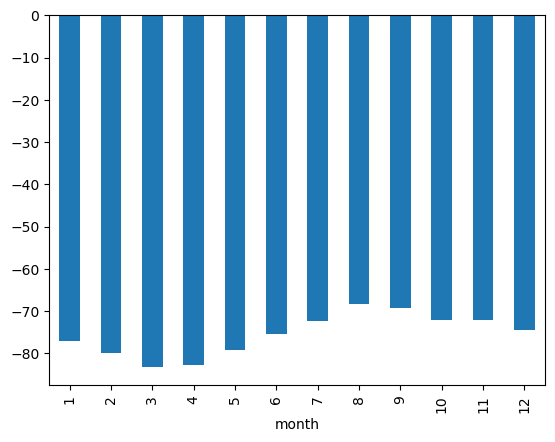

In [37]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
#Find the average minimum daily temperature for all of the months.
#Plot the results as a bar chart.

avg_min_temp = group_by_month['min_temp'].mean()


avg_min_temp_chart = avg_min_temp.plot.bar()


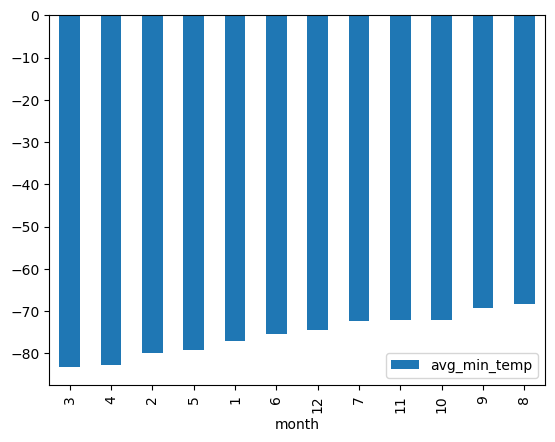

In [38]:
avg_min_temp_renamed = avg_min_temp.reset_index().rename(columns={'min_temp': 'avg_min_temp'})
avg_min_temp_renamed = avg_min_temp_renamed.set_index('month')
avg_min_temp_sorted = avg_min_temp_renamed.sort_values(by='avg_min_temp')
avg_min_temp_sorted_chart = avg_min_temp_sorted.plot.bar()
                                                

In [39]:
#Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
#Find the average daily atmospheric pressure of all the months.
#Plot the results as a bar chart.
avg_pressure = group_by_month['pressure'].mean()
print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


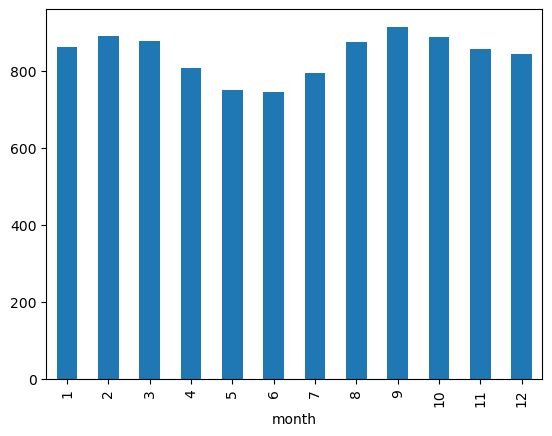

In [40]:
avg_pressure_chart = avg_pressure.plot.bar()

<AxesSubplot:xlabel='Number of Terrestrial Days', ylabel='Minimum Temp'>

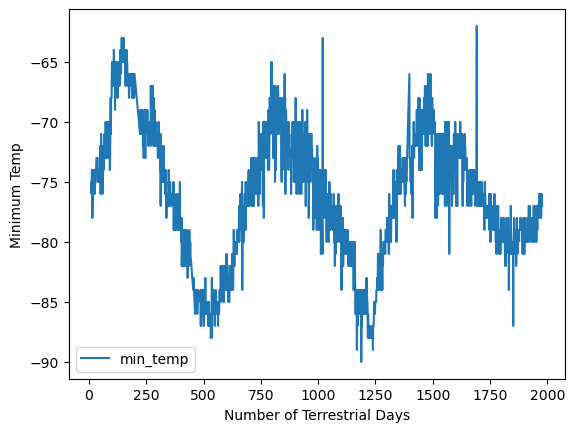

In [42]:
#About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
#Consider how many days elapse on Earth in the time that Mars circles the Sun once.
#Visually estimate the result by plotting the daily minimum temperature.

sorted_sol = mars_df.sort_values('sol')
sorted_sol.plot(x='sol', y='min_temp', xlabel = 'Number of Terrestrial Days', ylabel = 'Minimum Temp')


In [43]:
#Export the DataFrame to a CSV file.
mars_df.to_csv('data.csv')

In [45]:
browser.quit()